## Business Case

### About YG Telecom

YG Telecom is a start up mobile telecommunication in Germany. This company provides various services such as telephone services which has single and multiline services, internet services, online security and back up services, streaming movie services, along with customer support services such as tech support and device protection services. Their start up has been launched in various cities of Germany and seeing a good success however the company is currently facing challenges of customer due to competitors’ strategies. This not only affected the sales but also increase in customer resentment.


To address the Churn challenge, the YG telecom business wanted to understand the underlying causes which are leading for customer turnover and propose recommendation and come with strategical approaches to retain the customers there by increasing the revenue and avoiding the loss the company encounter due to customer turnover.

### Problem Statement

The key problem statements outlined by YG Telecom is documented as below.
-	Root Cause analysis for Customer Churn
-	Consumer segments causing high turnover
-	Factors influencing customer turnover
-	Way to predict the customer turnover to come up with a recommendation strategy to retain customer turnover

### Goal of ML Project

- Step 1  : Data Collection
- Step 2  : Importing the Libraries
- Step 3  : Loading the dataset
- Step 4  : Split the data into train and Test dataset
- Step 5  : Data Exploration
- Step 6  : Data Pre-processing
- Step 7  : Split the Feature label and target label of training
- Step 8  : Feature Engineering
- Step 9  : Train the Model
- Step 10 : Test The model 
- Step 11 : Performance Evaluation
- Step 12 : Feature Importance
- Step 13 : Findings, Conculsion and Recommendations

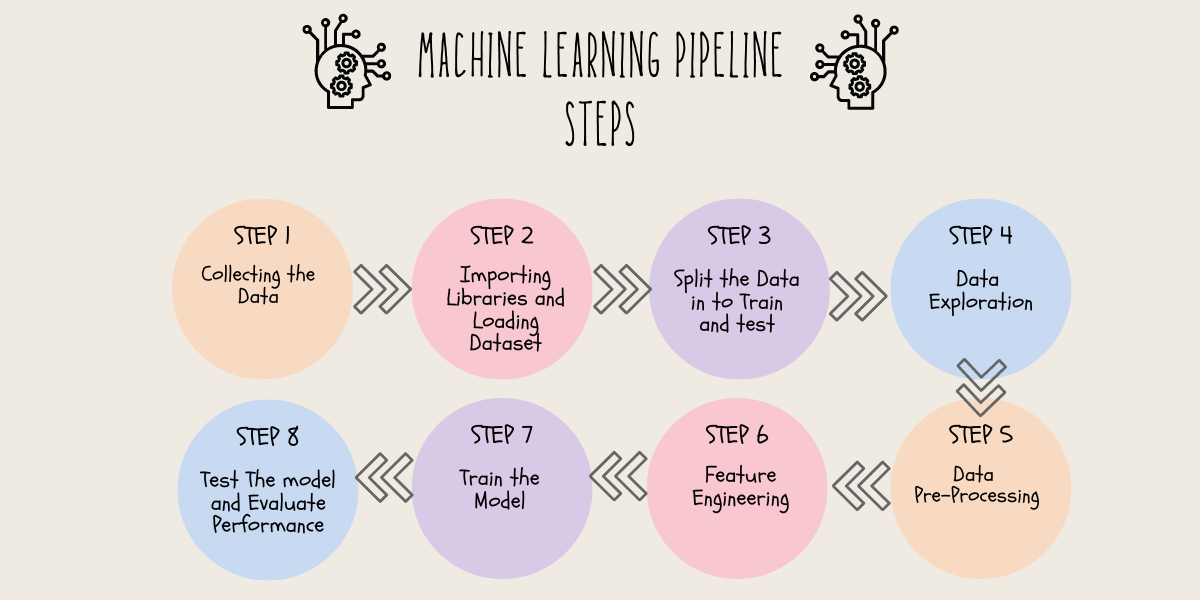

In [9]:
from IPython.display import Image
Image("ML Pipeline.png")

### Step 1 : Data Collection

Data Collection is one of the key step the data scientist performs once the problem statement is outlined. This step of data collection outlines what are the key data requirements to kick start the ML Pipeline. Data Collection stage answers the key questions such as source of data, data type, the ML Problem type (i.e classification or regression), key features of data available in the dataset which will further helpful in analysis purpose.

For the YG Telecom project the following Data Collection template shared and was updated and the following informaiton collected.


- **Source** : The dataset for this business case has been retreived from Kaggal (https://www.kaggle.com/datasets/blastchar/telco-customer-churn)


- **Problem Type** : Classification problem (Yes Or NO)
    - Yes - Customer is going to churn
    - No - Customer is not going to Churn
    
    
- **Data Type** : Count

### Step 2 : Importing Libraries

Python libraries provides various modules which inturn provide a standardized solutions in day to day programming. These libraries are collection of codes which can be used to run a program. the common libraries imported to build the ML are as follows :- 

In [1]:
import pandas as pd
import numpy as np
import sklearn.model_selection
from sklearn.model_selection import train_test_split
import sklearn.metrics
import sklearn.svm
import sklearn.tree
import sklearn.neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import sklearn.preprocessing
import sklearn.decomposition
import imblearn.over_sampling
import matplotlib.ticker as mtick
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

### Step 3 : Loading the Dataset

Once the required libraries are imported the next step is to load the dataset using pandas library. In the below line of code we have used pandas read_csv syntax to read the csv file which is saved in the datasets folder

In [2]:
CustomerData = pd.read_csv('Datasets/Customer-Churn.csv')
CustomerData.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# This syntax of .shape helps to retrieve the shae of data i.e in the given loaded set we have 7043 rows and 21 columns
CustomerData.shape 

(7043, 21)

In [4]:
# Pandas .columns syntax is a inbuilt function which is used to get the column names of the given dataframe.
# By using this we can access the columns using their column names

CustomerData.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### Step 4:  Split the dataset in to Train and Test Set

In Machine Learning - The dataset needs to be split in to train and test datasets which will help in evaluating the performance of model. In order to address the challenges of overfitting and underfitting the splitting of dataset in to train and test set is an imperative step which needs to be performed.

To split the dataset in to train and test model we use the following syntax from scikit Library. By using sklearn method train_test_split we can split the data in to training and test sets

In [5]:
CustomerData_Train, CustomerData_Test = sklearn.model_selection.train_test_split(CustomerData)
print("Customer_Traindata:", CustomerData_Train.shape)
print("Customer_Testdata:", CustomerData_Test.shape)

Customer_Traindata: (5282, 21)
Customer_Testdata: (1761, 21)


### Step 5: Data Exploration 

Exploratory data analysis is one of the important steps in machine learning pipeline as this step helps in outlining the following factors which will help YG Telecom to understand the underlying patterns of dataset.

- EDA helps in providing insight to dataset
- It helps in mapping the underlying structure
- It also helps in extracting the important patterns, informations and relationships of dataset

### I. Churn analysis based on People's Demographics

**a) Churn Analysis**

The churn analysis helps in providing an understanding on how many customers are churned based on the historical training dataset. for this analysis we have used a pie plot where we see that 

- 73% of customer are not churned from existing telecom portfolio
- 27% of customer have churned from telecom portfolio

AxesSubplot(0.260833,0.125;0.503333x0.755)
No     3890
Yes    1392
Name: Churn, dtype: int64


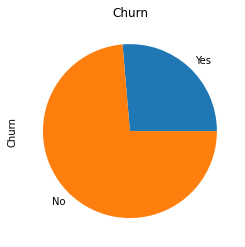

In [6]:
Churn_Analysis = list=(CustomerData_Train.Churn.value_counts(ascending=True))
print(Churn_Analysis.plot.pie())
print(Churn_Analysis.sort_values(ascending=False))
Graph1 = plt.title('Churn')   

#### b) Gender Analysis

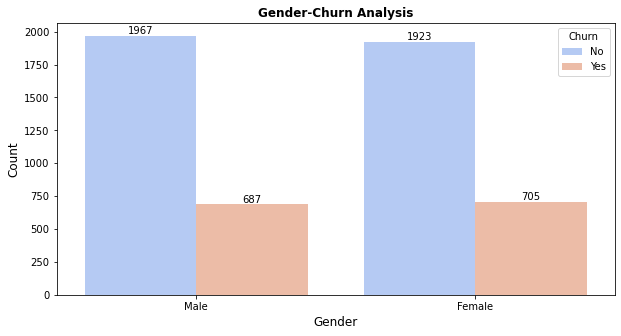

In [7]:
plt.figure(figsize = (10,5))
Gender_Analysis = sns.countplot(x='gender', hue = 'Churn', data = CustomerData_Train, palette = "coolwarm")
plt.title('Gender-Churn Analysis', weight = 'bold')
plt.xlabel('Gender', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
for i in Gender_Analysis.containers:
    Gender_Analysis.bar_label(i,)

#### C) Chur analysis based on Partner information

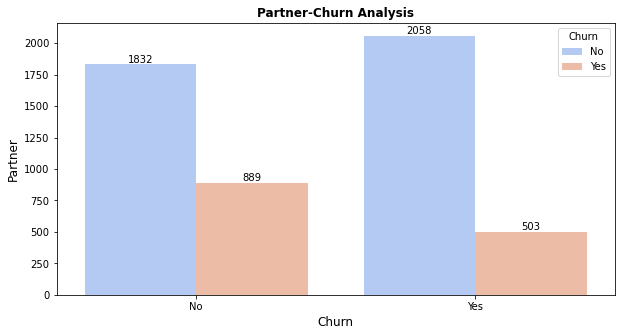

In [8]:
plt.figure(figsize = (10,5))
Partner_Analysis = sns.countplot(x = 'Partner', hue = 'Churn', data = CustomerData_Train, palette = "coolwarm")
plt.title('Partner-Churn Analysis', weight ='bold')
plt.xlabel('Churn', fontsize = 12)
plt.ylabel('Partner', fontsize = 12)
for i in Partner_Analysis.containers:
    Partner_Analysis.bar_label(i,)

#### d) Chur analysis based on Dependents information

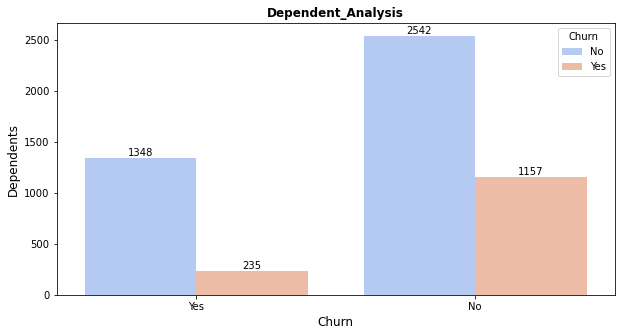

In [9]:
plt.figure(figsize = (10,5))
Dependent_Analysis = sns.countplot(x = 'Dependents', hue = 'Churn', data = CustomerData_Train, palette = "coolwarm")
plt.title('Dependent_Analysis', weight = 'bold')
plt.xlabel('Churn', fontsize = 12)
plt.ylabel('Dependents', fontsize = 12)
for i in Dependent_Analysis.containers:
    Dependent_Analysis.bar_label(i,)

### II. Churn analysis based on Services offered by Telecom

#### a) Phone Services - Churn Analysis

This analysis helps us in understanding the churn based on the PhoneService offered by YT Telecom. For analysis purpose PhoneService Column and Churn Column taken in to consedieration.

**Phoneservice Analysis 1 :**

Customers opted for Phone Services : 91% 
Customer not opted for phone service : 9%


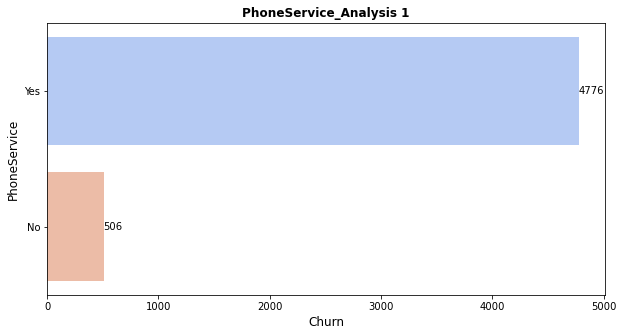

In [10]:
plt.figure(figsize = (10,5))
PhoneService = sns.countplot(y='PhoneService', data = CustomerData_Train, palette = "coolwarm")
plt.title('PhoneService_Analysis 1', weight = 'bold')
plt.xlabel('Churn', fontsize = 12)
plt.ylabel('PhoneService', fontsize = 12)
for i in PhoneService.containers:
    PhoneService.bar_label(i,)

**Phoneservice Analysis 2 :
Churn Rate**

- Customer opted - Not Churned : 73%
- Customer opted - Churned : 27%


- Customer Not opted - Not Churned : 76%
- Customer Not opted - Churned : 24%

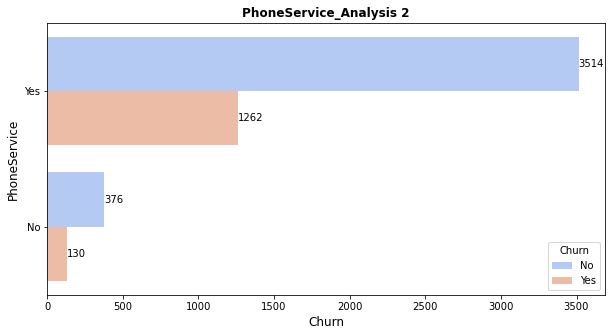

In [11]:
plt.figure(figsize = (10,5))
PhoneService = sns.countplot(y='PhoneService', hue = 'Churn', data = CustomerData_Train, palette = "coolwarm")
plt.title('PhoneService_Analysis 2', weight = 'bold')
plt.xlabel('Churn', fontsize = 12)
plt.ylabel('PhoneService', fontsize = 12)
for i in PhoneService.containers:
    PhoneService.bar_label(i,)

#### b) Multiple_Lines - Churn Analysis

This analysis helps us in understanding the churn based on the Multiple_Lines offered by YG Telecom. For analysis purpose Multiple_Lines Column and Churn Column taken in to consedieration.

**Multiple_Lines Analysis 1 :**

- Customers opted for Multi_Phone_Service : 43% Opted
- Customer not opted for phone service : 48% Not opted
- Customer not opted no_phone_service : 9% No phone Service


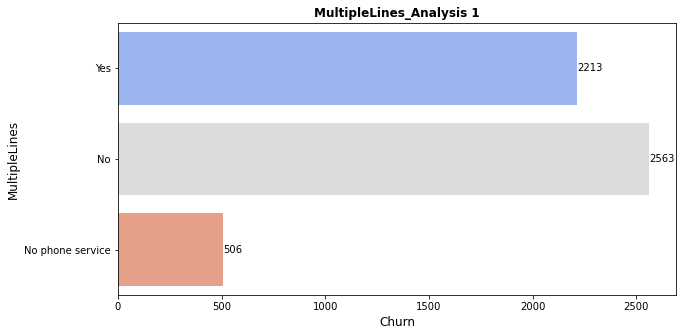

In [12]:
plt.figure(figsize = (10,5))
MultipleLines = sns.countplot(y='MultipleLines', data = CustomerData_Train, palette = "coolwarm")
plt.title('MultipleLines_Analysis 1', weight = 'bold')
plt.xlabel('Churn', fontsize = 12)
plt.ylabel('MultipleLines', fontsize = 12)
for i in MultipleLines.containers:
    MultipleLines.bar_label(i,)

**Multiple_Lines Analysis 2 :
Churn Rate**

**No for any Phone Service**
- Not Churn - 76%
- Churn - 24%

**Opted for MultiLine Service**
- Not Churn - 71% 
- Churn - 29%

**Not Opted for MultiLine Service**
- Not Churn - 74% 
- Churn - 26%

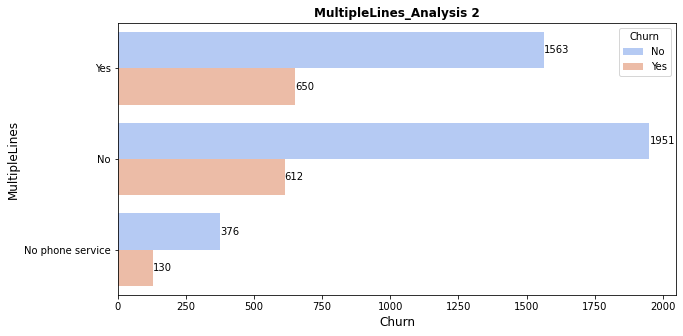

In [13]:
plt.figure(figsize = (10,5))
MultipleLines = sns.countplot(y='MultipleLines', hue = 'Churn', data = CustomerData_Train, palette = "coolwarm")
plt.title('MultipleLines_Analysis 2', weight = 'bold')
plt.xlabel('Churn', fontsize = 12)
plt.ylabel('MultipleLines', fontsize = 12)
for i in MultipleLines.containers:
    MultipleLines.bar_label(i,)

#### c) Internet Services - Churn Analysis

This analysis helps us in understanding the churn based on the Internet Services offered by YG Telecom. For analysis purpose Internet Services Column and Churn Column taken in to consedieration.

**Internet Services 1 :**

- Customers opted for DSL : 35% Opted
- Customer not opted Internet Services : 21%
- Customer not opted Fiber Optic : 44%

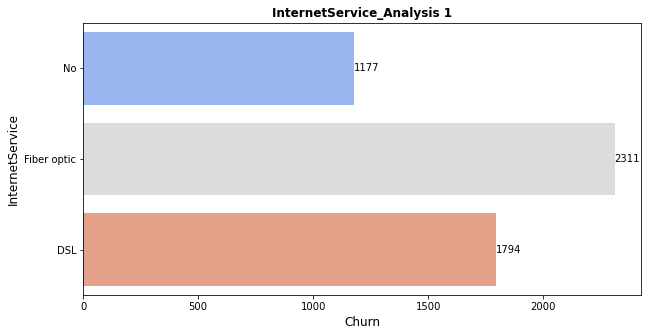

In [14]:
plt.figure(figsize = (10,5))
InternetService = sns.countplot(y = 'InternetService', data = CustomerData_Train, palette = "coolwarm")
plt.title('InternetService_Analysis 1', weight = 'bold')
plt.xlabel('Churn', fontsize = 12)
plt.ylabel('InternetService', fontsize = 12)
for i in InternetService.containers:
    InternetService.bar_label(i,)

**Internet Service Analysis 2 :
Churn Rate**

**DSL**
- Not Churn - 82%
- Churn - 18%

**No**
- Not Churn - 93% 
- Churn - 7%

**Fiber Optic**
- Not Churn - 58% 
- Churn - 42%

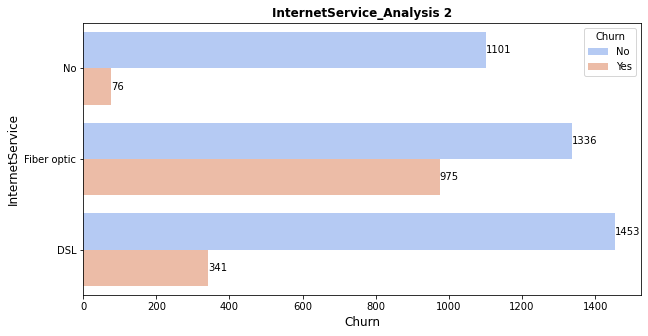

In [15]:
plt.figure(figsize = (10,5))
InternetService = sns.countplot(y = 'InternetService', hue = 'Churn', data = CustomerData_Train, palette = "coolwarm")
plt.title('InternetService_Analysis 2', weight = 'bold')
plt.xlabel('Churn', fontsize = 12)
plt.ylabel('InternetService', fontsize = 12)
for i in InternetService.containers:
    InternetService.bar_label(i,)

#### d) Online Secuirty - Churn Analysis

This analysis helps us in understanding the churn based on the Online Security Services offered by YG Telecom. For analysis purpose Online Security Services Column and Churn Column taken in to consedieration.

**Online Security Analysis 1 :**

- Customers opted for Online Security : 29%
- Customer not opted online Security : 50%
- Customer not opted for any internet services : 21% 

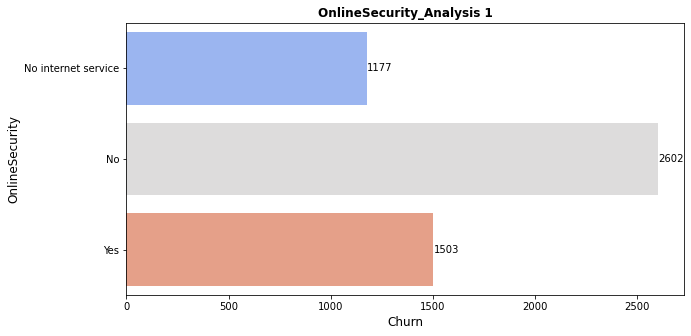

In [16]:
plt.figure(figsize = (10,5))
OnlineSecurity = sns.countplot(y = 'OnlineSecurity', data = CustomerData_Train, palette = "coolwarm")
plt.title('OnlineSecurity_Analysis 1', weight = 'bold')
plt.xlabel('Churn', fontsize = 12)
plt.ylabel('OnlineSecurity', fontsize = 12)
for i in OnlineSecurity.containers:
    OnlineSecurity.bar_label(i,)

**Online Security Analysis 2 :
Churn Rate**

**Opted for Online Security**
- Not Churn - 86%
- Churn - 14%

**Not Opted for online Security**
- Not Churn - 58% 
- Churn - 42%

**No Internet Service at all**
- Not Churn - 93% 
- Churn - 7%

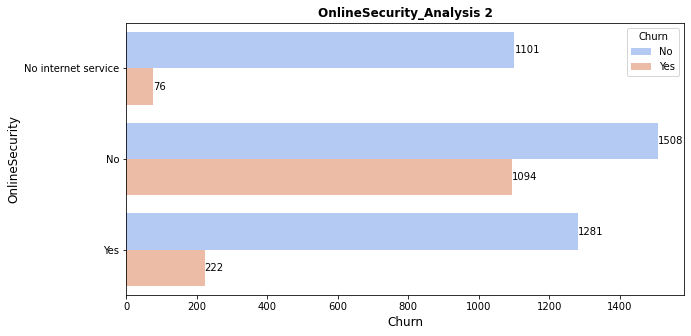

In [17]:
plt.figure(figsize = (10,5))
OnlineSecurity = sns.countplot(y = 'OnlineSecurity', hue = 'Churn', data = CustomerData_Train, palette = "coolwarm")
plt.title('OnlineSecurity_Analysis 2', weight = 'bold')
plt.xlabel('Churn', fontsize = 12)
plt.ylabel('OnlineSecurity', fontsize = 12)
for i in OnlineSecurity.containers:
    OnlineSecurity.bar_label(i,)

#### e) Online Backup - Churn Analysis

This analysis helps us in understanding the churn based on the Online Backup Services offered by YG Telecom. For analysis purpose Online Backup Services Column and Churn Column taken in to consedieration.

**Online Backup Analysis 1 :**

- Customers opted for Online Backup : 35%
- Customer not opted online Back up : 44%
- Customer not opted for any internet services : 21% 

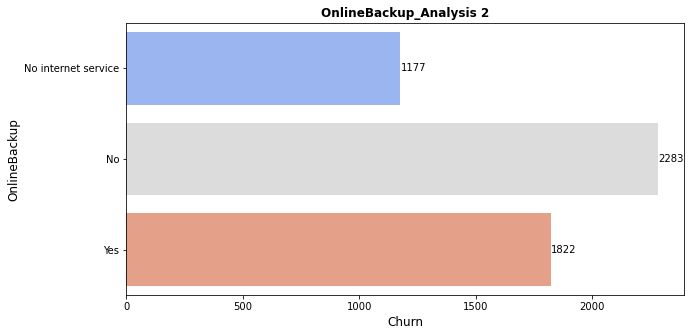

In [18]:
plt.figure(figsize = (10,5))
OnlineBackup = sns.countplot(y = 'OnlineBackup', data = CustomerData_Train, palette = "coolwarm")
plt.title('OnlineBackup_Analysis 2', weight = 'bold')
plt.xlabel('Churn', fontsize = 12)
plt.ylabel('OnlineBackup', fontsize = 12)
for i in OnlineBackup.containers:
    OnlineBackup.bar_label(i,)

**Online Backup Analysis 2 :
Churn Rate**

**Opted for Online Backup**
- Not Churn - 79%
- Churn - 21%

**Not Opted for online Backup**
- Not Churn - 60% 
- Churn - 40%

**No Internet Service at all**
- Not Churn - 93% 
- Churn - 7%

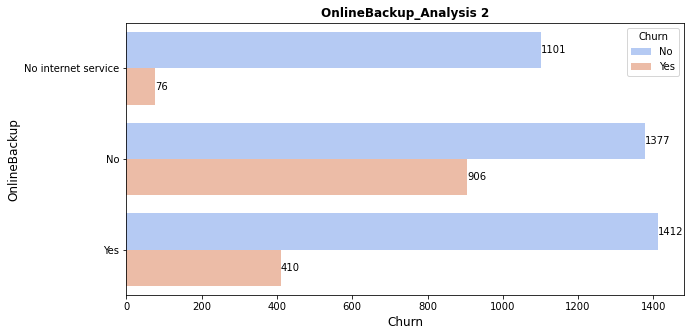

In [19]:
plt.figure(figsize = (10,5))
OnlineBackup = sns.countplot(y = 'OnlineBackup', hue = 'Churn', data = CustomerData_Train, palette = "coolwarm")
plt.title('OnlineBackup_Analysis 2', weight = 'bold')
plt.xlabel('Churn', fontsize = 12)
plt.ylabel('OnlineBackup', fontsize = 12)
for i in OnlineBackup.containers:
    OnlineBackup.bar_label(i,)

#### f) Device Protection - Churn Analysis

This analysis helps us in understanding the churn based on the Device Protection Services offered by YG Telecom. For analysis purpose Device Protection Services Column and Churn Column taken in to consedieration.

**Device Protection Analysis 1 :**

- Customers opted for Device Protection : 34%
- Customer not opted Device Protection : 45%
- Customer not opted for any internet services : 21% 

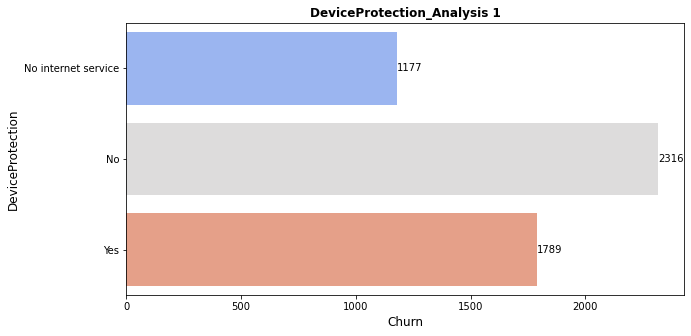

In [20]:
plt.figure(figsize = (10,5))
DeviceProtection = sns.countplot(y = 'DeviceProtection', data = CustomerData_Train, palette = "coolwarm")
plt.title('DeviceProtection_Analysis 1', weight = 'bold')
plt.xlabel('Churn', fontsize = 12)
plt.ylabel('DeviceProtection', fontsize = 12)
for i in DeviceProtection.containers:
    DeviceProtection.bar_label(i,)

**Device Protection Analysis 2 :
Churn Rate**

**Opted for Device Protection**
- Not Churn - 78%
- Churn - 22%

**Not Opted for Device Protection**
- Not Churn - 60% 
- Churn - 40%

**No Internet Service at all**
- Not Churn - 93% 
- Churn - 7%

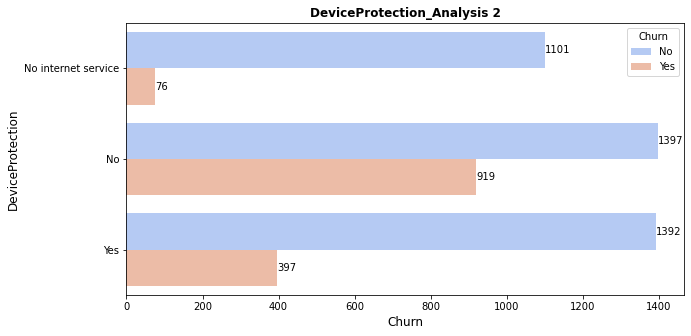

In [21]:
plt.figure(figsize = (10,5))
DeviceProtection = sns.countplot(y = 'DeviceProtection', hue = 'Churn', data = CustomerData_Train, palette = "coolwarm")
plt.title('DeviceProtection_Analysis 2', weight = 'bold')
plt.xlabel('Churn', fontsize = 12)
plt.ylabel('DeviceProtection', fontsize = 12)
for i in DeviceProtection.containers:
    DeviceProtection.bar_label(i,)

#### g) Tech Support - Churn Analysis

This analysis helps us in understanding the churn based on the Tech Support Services offered by YG Telecom. For analysis purpose Tech Support Services Column and Churn Column taken in to consedieration.

**Tech Support Analysis 1 :**

- Customers opted for Tech Support : 29%
- Customer not opted Tech Support : 50%
- Customer not opted for any internet services : 21% 

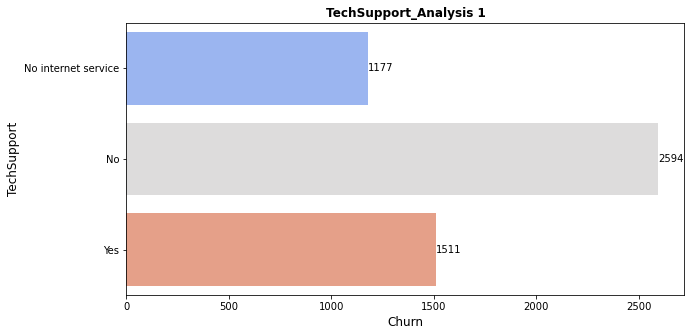

In [22]:
plt.figure(figsize = (10,5))
TechSupport = sns.countplot(y = 'TechSupport', data = CustomerData_Train, palette = "coolwarm")
plt.title('TechSupport_Analysis 1', weight = 'bold')
plt.xlabel('Churn', fontsize = 12)
plt.ylabel('TechSupport', fontsize = 12)
for i in TechSupport.containers:
    TechSupport.bar_label(i,)

**Tech Support Analysis 2 :
Churn Rate**

**Opted for Tech Support**
- Not Churn - 85%
- Churn - 15%

**Not Opted for Tech Support**
- Not Churn - 58% 
- Churn - 42%

**No Internet Service at all**
- Not Churn - 93% 
- Churn - 7%

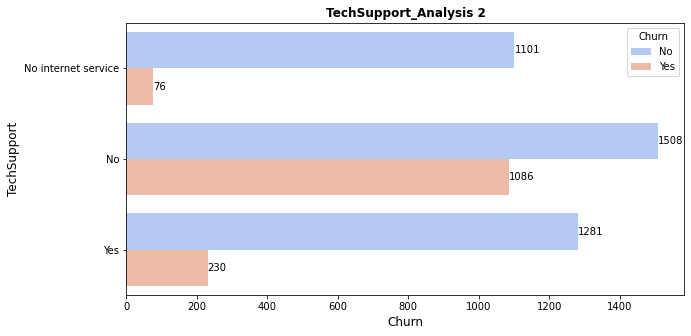

In [23]:
plt.figure(figsize = (10,5))
TechSupport = sns.countplot(y = 'TechSupport', hue = 'Churn', data = CustomerData_Train, palette = "coolwarm")
plt.title('TechSupport_Analysis 2', weight = 'bold')
plt.xlabel('Churn', fontsize = 12)
plt.ylabel('TechSupport', fontsize = 12)
for i in TechSupport.containers:
    TechSupport.bar_label(i,)

#### h) StreamingTV - Churn Analysis

This analysis helps us in understanding the churn based on the StreamingTV Services offered by YG Telecom. For analysis purpose Streaming TV Services Column and Churn Column taken in to consedieration.

**Streaming TV Analysis 1 :**

- Customers opted for Streaming TV : 39%
- Customer not opted Streaming TV : 40%
- Customer not opted for any internet services : 21% 

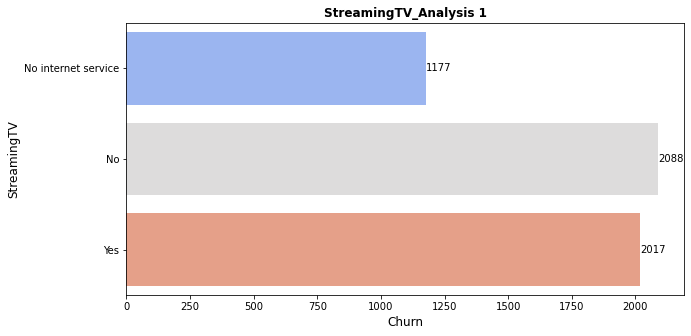

In [24]:
plt.figure(figsize = (10,5))
StreamingTV = sns.countplot(y = 'StreamingTV', data = CustomerData_Train, palette = "coolwarm")
plt.title('StreamingTV_Analysis 1', weight = 'bold')
plt.xlabel('Churn', fontsize = 12)
plt.ylabel('StreamingTV', fontsize = 12)
for i in StreamingTV.containers:
    StreamingTV.bar_label(i,)

**Streaming TV Analysis 2 :
Churn Rate**

**Opted for Streaming TV**
- Not Churn - 70%
- Churn - 30%

**Not Opted for Streaming TV**
- Not Churn - 66% 
- Churn - 34%

**No Internet Service at all**
- Not Churn - 93% 
- Churn - 7%

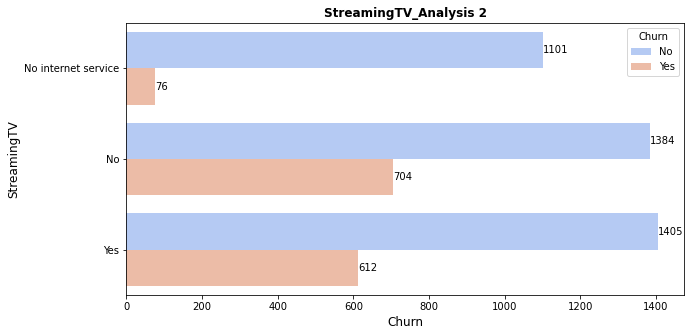

In [25]:
plt.figure(figsize = (10,5))
StreamingTV = sns.countplot(y = 'StreamingTV', hue = 'Churn', data = CustomerData_Train, palette = "coolwarm")
plt.title('StreamingTV_Analysis 2', weight = 'bold')
plt.xlabel('Churn', fontsize = 12)
plt.ylabel('StreamingTV', fontsize = 12)
for i in StreamingTV.containers:
    StreamingTV.bar_label(i,)

#### i) StreamingMovies - Churn Analysis


This analysis helps us in understanding the churn based on the Streaming Movies Services offered by YG Telecom. For analysis purpose Streaming Movies Services Column and Churn Column taken in to consedieration.

**Streaming MOvies Analysis 1 :**

- Customers opted for Streaming Movies : 39%
- Customer not opted Streaming Movies : 40%
- Customer not opted for any internet services : 21% 

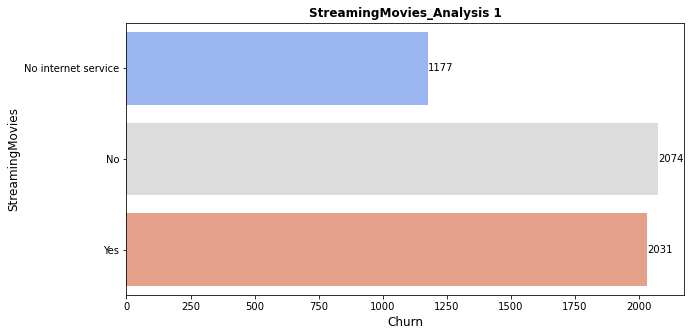

In [26]:
plt.figure(figsize = (10,5))
StreamingMovies = sns.countplot(y = 'StreamingMovies', data = CustomerData_Train, palette = "coolwarm")
plt.title('StreamingMovies_Analysis 1', weight = 'bold')
plt.xlabel('Churn', fontsize = 12)
plt.ylabel('StreamingMovies', fontsize = 12)
for i in StreamingMovies.containers:
    StreamingMovies.bar_label(i,)

**Streaming Movies Analysis 2 :
Churn Rate**

**Opted for Streaming Movies**
- Not Churn - 71%
- Churn - 29%

**Not Opted for Streaming Movies**
- Not Churn - 66% 
- Churn - 34%

**No Internet Service at all**
- Not Churn - 93% 
- Churn - 7%

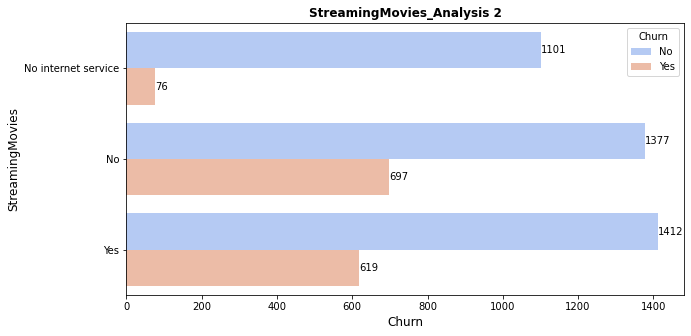

In [27]:
plt.figure(figsize = (10,5))
StreamingMovies = sns.countplot(y = 'StreamingMovies', hue = 'Churn', data = CustomerData_Train, palette = "coolwarm")
plt.title('StreamingMovies_Analysis 2', weight = 'bold')
plt.xlabel('Churn', fontsize = 12)
plt.ylabel('StreamingMovies', fontsize = 12)
for i in StreamingMovies.containers:
    StreamingMovies.bar_label(i,)

### Contract Billing and payment method Analysis

#### a) Contract - Churn Analysis


This analysis helps us in understanding the churn based on the Contract Services offered by YG Telecom. For analysis purpose Contract Column and Churn Column taken in to consedieration.

**Contract Analysis 1 :**

- Customers opted for one year Contract : 21%
- Customer opted for two year Contract : 24%
- Customer opted month to month : 55% 

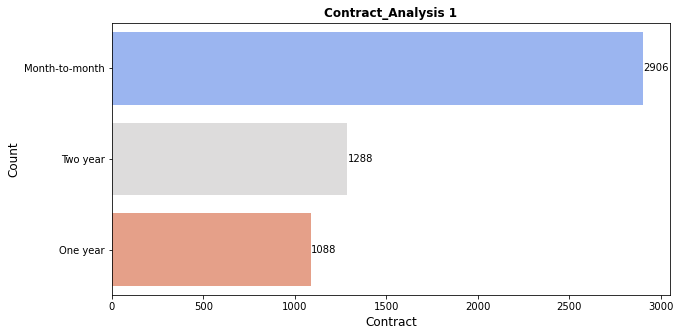

In [28]:
plt.figure(figsize = (10,5))
Contract = sns.countplot(y = 'Contract', data = CustomerData_Train, palette = "coolwarm")
plt.title('Contract_Analysis 1', weight = 'bold')
plt.xlabel('Contract', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
for i in Contract.containers:
    Contract.bar_label(i,)

**Contract_Analysis 2 :
Churn Rate**

**Customers opted for one year Contract**

- Not Churn - 88%
- Churn - 12%

**Customer opted for two year Contract%**

- Not Churn - 97% 
- Churn - 3%

**- Customer opted month to month**
- Not Churn - 57% 
- Churn - 43%

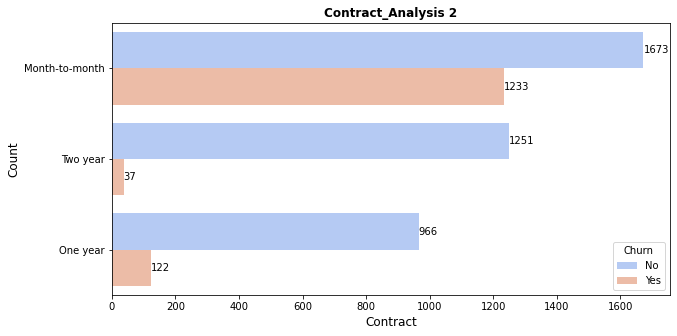

In [29]:
plt.figure(figsize = (10,5))
Contract = sns.countplot(y = 'Contract', hue = 'Churn', data = CustomerData_Train, palette = "coolwarm")
plt.title('Contract_Analysis 2', weight = 'bold')
plt.xlabel('Contract', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
for i in Contract.containers:
    Contract.bar_label(i,)

#### b) Paperless Billing - Churn Analysis

This analysis helps us in understanding the churn based on the Paperless Billing method of YG Telecom. For analysis purpose Paperless billing Column and Churn Column taken in to consedieration.

**Paperless Billing Analysis 1 :**

- Customers opted for Paperless billing : 59%
- Customer not opted for Paperless Billing : 41%

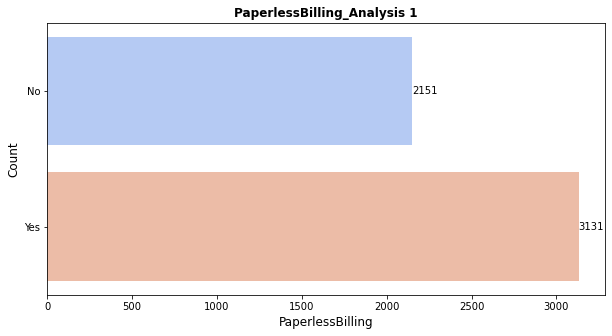

In [30]:
plt.figure(figsize = (10,5))
PaperlessBilling = sns.countplot(y='PaperlessBilling', data = CustomerData_Train, palette = "coolwarm")
plt.title('PaperlessBilling_Analysis 1', weight = 'bold')
plt.xlabel('PaperlessBilling', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
for i in PaperlessBilling.containers:
    PaperlessBilling.bar_label(i,)

**Paperless Billing Analysis2 :**
Churn Rate**

**Customers opted for Paperless billing**

- Not Churn - 66%
- Churn - 34%

**Customer not opted for Paperless Billing**

- Not Churn - 84% 
- Churn - 16%

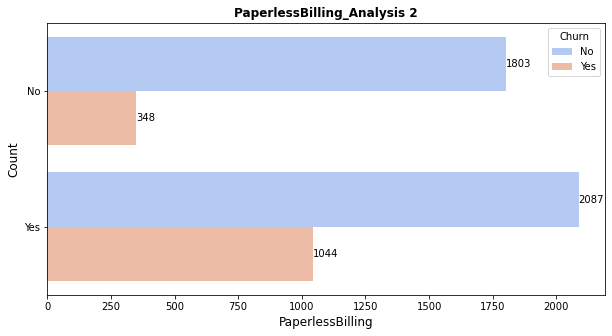

In [31]:
plt.figure(figsize = (10,5))
PaperlessBilling = sns.countplot(y='PaperlessBilling', hue = 'Churn', data = CustomerData_Train, palette = "coolwarm")
plt.title('PaperlessBilling_Analysis 2', weight = 'bold')
plt.xlabel('PaperlessBilling', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
for i in PaperlessBilling.containers:
    PaperlessBilling.bar_label(i,)

#### c) Payment Method - Churn Analysis

This analysis helps us in understanding the churn based on the Payment method of YG Telecom. For analysis purpose Payment method Column and Churn Column taken in to consedieration.

**Payment Method Analysis 1 :**

- Customers opted for Bank Transfer : 22%
- Customer opted Credit Card : 22%
- Customer opted mailed check : 23%
- Customer opted Electronic Check : 33%

In [32]:
plt.figure(figsize = 10,5))
PaymentMethod = sns.countplot(y = PaymentMethod', data = CustomerData_Train, palette = coolwarm")
plt.title('PaymentMethod_Analysis 1', weight = "bold")
plt.xlabel('PaymentMethod', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
for i in PaymentMethod.containers:
    PaymentMethod.bar_label(i,)

SyntaxError: positional argument follows keyword argument (Temp/ipykernel_15008/292848251.py, line 1)

**Payment Method Analysis2 :**
Churn Rate**

**Customers opted for Bank Transfer**

- Not Churn - 84%
- Churn - 16%

**Customer opted Credit Card**

- Not Churn - 85% 
- Churn - 15%

**Customer opted mailed check**

- Not Churn - 81% 
- Churn - 19%

**Customer opted Electronic Check**

- Not Churn - 54% 
- Churn - 46%

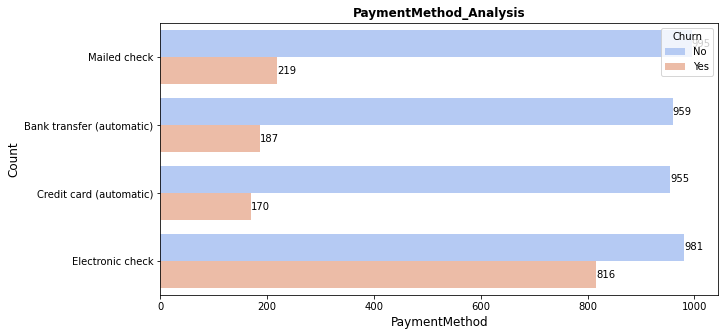

In [33]:
plt.figure(figsize = (10,5))
PaymentMethod = sns.countplot(y = 'PaymentMethod', hue = 'Churn', data = CustomerData_Train, palette = "coolwarm")
plt.title('PaymentMethod_Analysis', weight = 'bold')
plt.xlabel('PaymentMethod', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
for i in PaymentMethod.containers:
    PaymentMethod.bar_label(i,)

#### C) Correlation

In [34]:
CustomerData_Train.corr()

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.023065,0.218394
tenure,0.023065,1.000000,0.254390
MonthlyCharges,0.218394,0.254390,1.000000


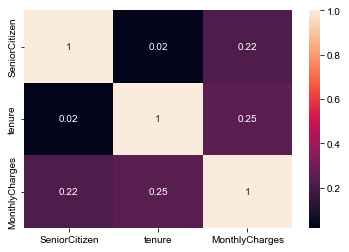

In [35]:
Correlation = CustomerData_Train.corr().round(2)
sns.heatmap(Correlation, annot = True)
sns.set(rc = {'figure.figsize':(20,20)})
plt.show()

#### d) Describe the Data

In [36]:
CustomerData_Train.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,5282.000000,5282.000000,5282.000000
mean,0.161681,32.161113,64.436946
std,0.368193,24.558838,30.320252
min,0.000000,0.000000,18.250000
25%,0.000000,8.250000,34.512500
50%,0.000000,28.000000,70.200000
75%,0.000000,55.000000,89.800000
max,1.000000,72.000000,118.650000


Text(0.5, 1.0, '# of Customers by their tenure')

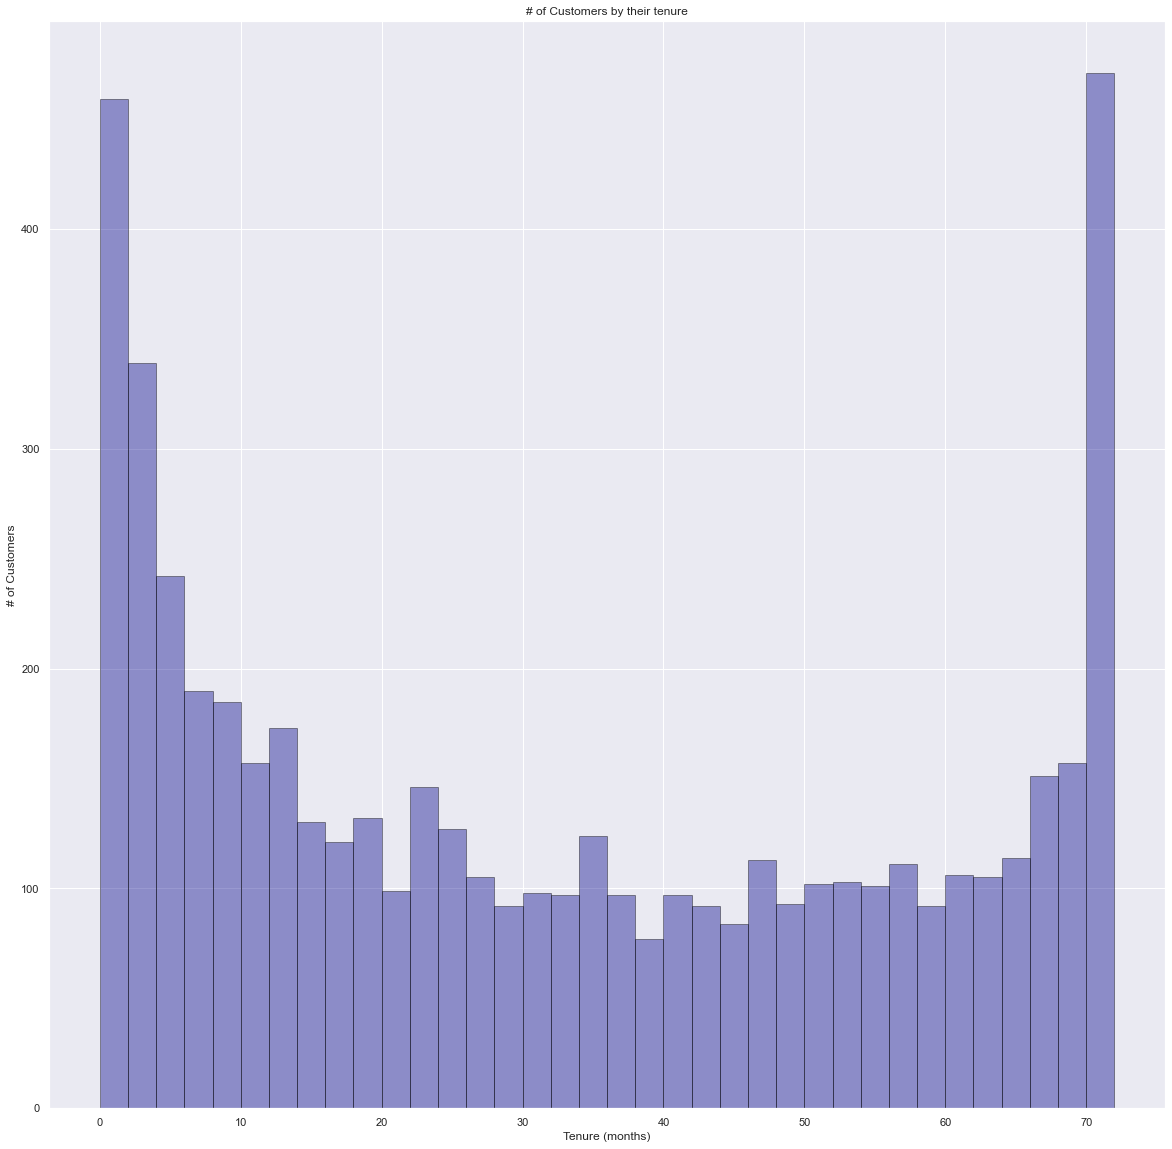

In [37]:
# tenure of cutomer with YG Company

Tenure = sns.distplot(CustomerData_Train['tenure'], hist = True, kde = False, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws = {'edgecolor':'black'},
             kde_kws = {'linewidth': 4})
Tenure.set_ylabel('# of Customers')
Tenure.set_xlabel('Tenure (months)')
Tenure.set_title('# of Customers by their tenure')

<Figure size 1080x720 with 0 Axes>

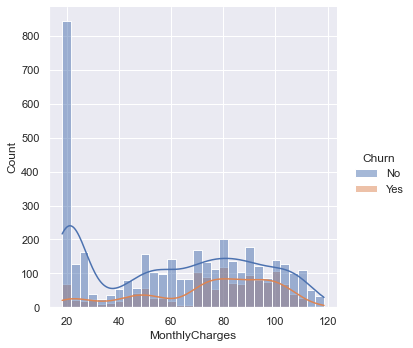

In [38]:
plt.figure(figsize = (15,10))
sns.displot(data = CustomerData_Train, x = "MonthlyCharges", hue = "Churn", bins = 30, kde = True)

##### Customer Churn Analysis based on Contract Type

From the below data we see that most of the churn has been observed in month to month contract type when compared to yearly contract types

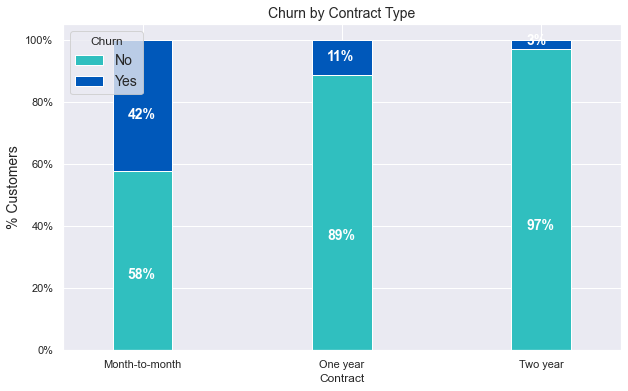

In [39]:
colors = ['#30bfbf','#0058ba']
contract_churn = CustomerData_Train.groupby(['Contract','Churn']).size().unstack()

Contract_Type = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind = 'bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (10,6),
                                                                color = colors)
Contract_Type.yaxis.set_major_formatter(mtick.PercentFormatter())
Contract_Type.legend(loc = 'best',prop = {'size':14},title = 'Churn')
Contract_Type.set_ylabel('% Customers',size = 14)
Contract_Type.set_title('Churn by Contract Type',size = 14)

# Code to add the data labels on the stacked bar chart
for p in Contract_Type.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    Contract_Type.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

##  Data Pre-Processing

Data preprocessing is performed in order to clean the data quality issues. This step ensures that anomolies in the datapoints are addressed. This ensures that the right data is fed to model. Following are the key activities covered to clean the training dataset.

- Checking the null values or missing values in the dataset
- Checking for duplicate values in the dataset
- Checking for outliers in the dataset by describing the features which are numerical in nature

In [40]:
# Checking for null values in the dataset. from the below line of code we see that there are no null values or missing values in dataset 
print(CustomerData_Train.shape)
print(CustomerData_Train.isnull().sum())

(5282, 21)
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [41]:
# Checking for duplicate values dataset
CustomerData_Train.duplicated().sum()

0

In [42]:
# Describing the data of churn column to map the outlier
CustomerData_Train.groupby('Churn').describe()

SeniorCitizen                                               tenure  \
              count      mean       std  min  25%  50%  75%  max   count   
Churn                                                                      
No           3890.0  0.125450  0.331271  0.0  0.0  0.0  0.0  1.0  3890.0   
Yes          1392.0  0.262931  0.440384  0.0  0.0  0.0  1.0  1.0  1392.0   

                  ...             MonthlyCharges                               \
            mean  ...   75%   max          count       mean        std    min   
Churn             ...                                                           
No     37.059897  ...  61.0  72.0         3890.0  60.691877  31.253709  18.25   
Yes    18.471264  ...  30.0  72.0         1392.0  74.902694  24.707282  18.85   

                                       
         25%     50%      75%     max  
Churn                                  
No     24.95  63.875  86.9375  118.65  
Yes    56.25  79.950  94.6500  117.80  

[2 rows x 24 columns]

Text(0.5, 1.0, 'Distribution of Tenure by churn')

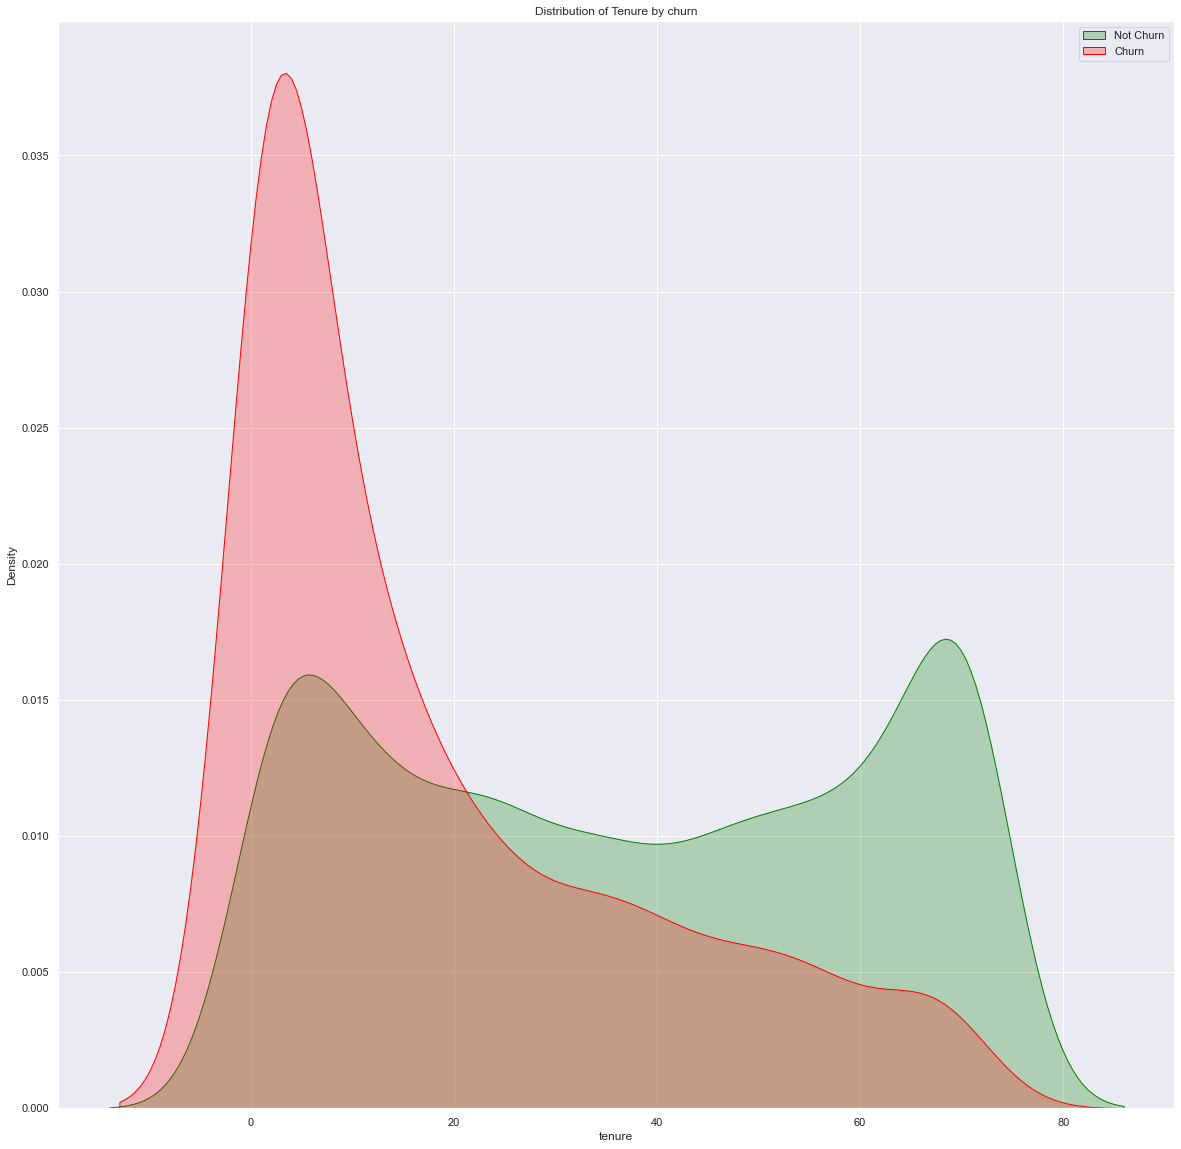

In [43]:
#visual represenation of churn distribution

ax = sns.kdeplot(CustomerData_Train.tenure[(CustomerData_Train["Churn"] == 'No') ],
                color = "Green", shade = True)
ax = sns.kdeplot(CustomerData_Train.tenure[(CustomerData_Train["Churn"] == 'Yes') ],
                ax = ax, color = "Red", shade = True)
ax.legend(["Not Churn","Churn"],loc = 'upper right')
ax.set_ylabel('Density')
ax.set_xlabel('tenure')
ax.set_title('Distribution of Tenure by churn')

Text(0.5, 1.0, 'Distribution of monthly charges by churn')

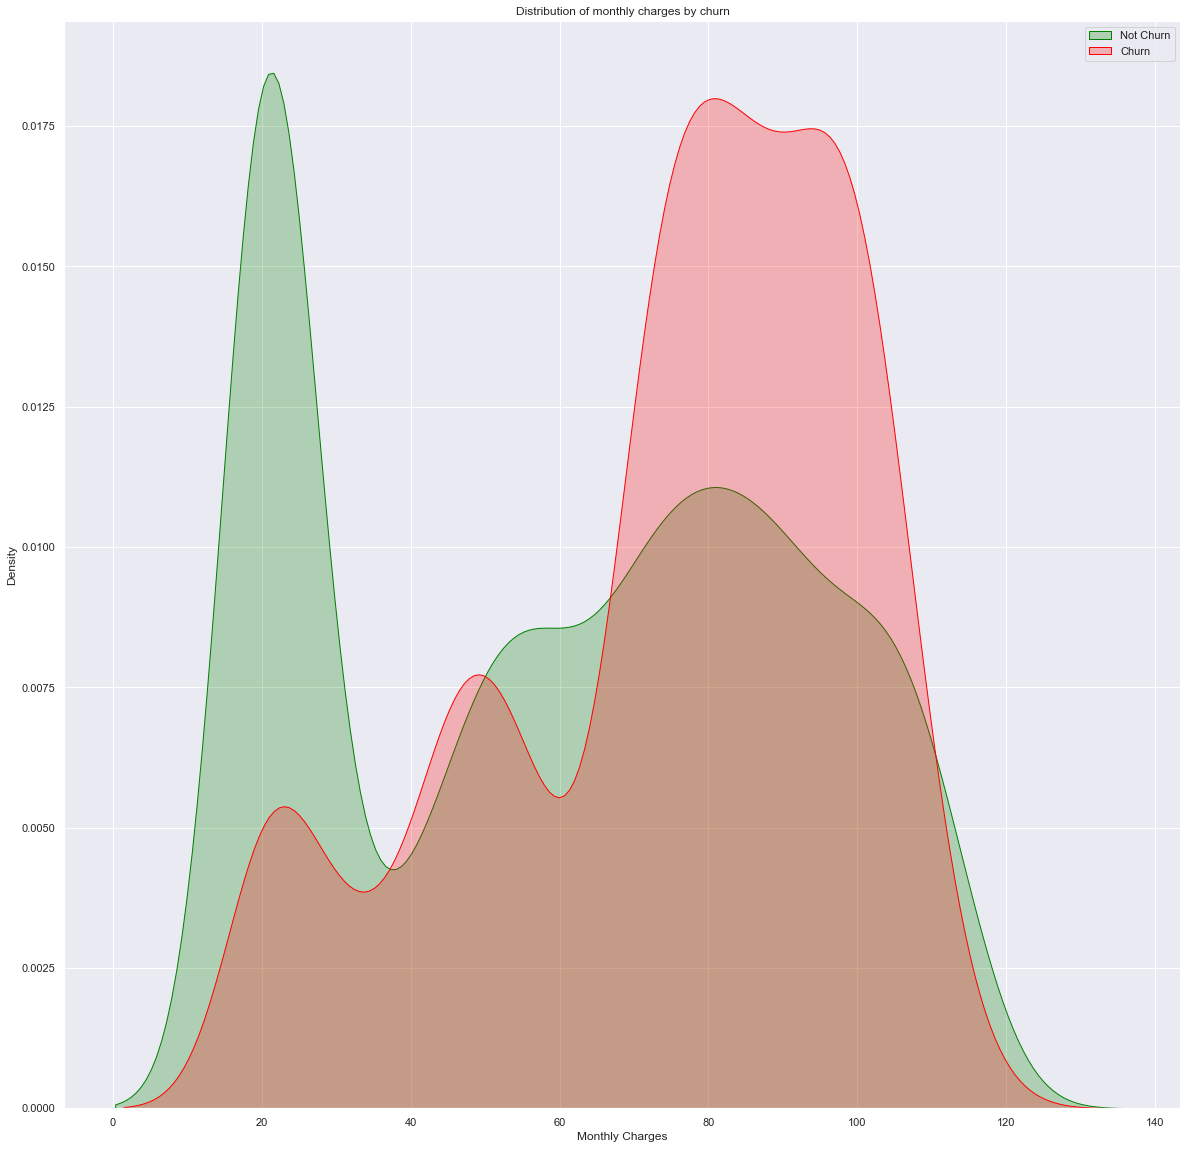

In [44]:
ax = sns.kdeplot(CustomerData_Train.MonthlyCharges[(CustomerData_Train["Churn"] == 'No') ],
                color = "Green", shade = True)
ax = sns.kdeplot(CustomerData_Train.MonthlyCharges[(CustomerData_Train["Churn"] == 'Yes') ],
                ax = ax, color = "Red", shade = True)
ax.legend(["Not Churn","Churn"],loc ='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')

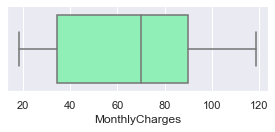

In [45]:
## Monthly Charges
MonthlyCharges = sns.catplot(x = "MonthlyCharges",
                data = CustomerData_Train, kind = "box",
                height = 2, aspect = 2, palette = "rainbow")

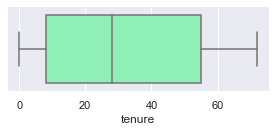

In [46]:
## Tenure
MonthlyCharges = sns.catplot(x = "tenure",
                data = CustomerData_Train, kind = "box",
                height = 2, aspect = 2, palette = "rainbow")

#### Splitting the Features and Target Labels

In [47]:
Cust_x_trn = CustomerData_Train.drop(["Churn"], axis = 1)
Cust_y_trn = CustomerData_Train["Churn"]
print("Cust_x_trn:", Cust_x_trn.shape)
print("Cust_y_trn:", Cust_y_trn.shape)

Cust_x_tst = CustomerData_Test.drop(["Churn"], axis = 1)
Cust_y_tst = CustomerData_Test["Churn"]
print("Cust_x_tst:", Cust_x_tst.shape)
print("Cust_y_tst:", Cust_y_tst.shape)

Cust_x_trn: (5282, 20)
Cust_y_trn: (5282,)
Cust_x_tst: (1761, 20)
Cust_y_tst: (1761,)


##  Feature Engineering

Feature Engineering is the process of transforming raw data into features that are useful for the machine learning models. This can be done by identifying and extracting relevant features from the data, or by creating new features that are more representative of the data. Feature engineering is important because it can improve the accuracy of machine learning models and help them to learn from data more effectively. 
There are many ways to engineer features, and the approach that is used will depend on the data and the machine learning algorithm that is being used

### a. One hot encoding
One hot encoding is a technique used to represent categorical data as a series of numbers. This is done by converting each category into a separate column, and then assigning a unique number to each column. The advantage of using one hot encoding is that it makes it easier to train machine learning models on categorical data.

In [48]:
encoding_tsk = sklearn.preprocessing.OneHotEncoder(handle_unknown = "ignore")
encoding_tsk.fit(Cust_x_trn)

Cust_x_trn_encod = encoding_tsk.transform(Cust_x_trn).toarray()

Cust_x_tst_encod = encoding_tsk.transform(Cust_x_tst).toarray()

print("Cust_x_trn_encod:", Cust_x_trn_encod.shape)
print("Cust_x_tst_encod:", Cust_x_tst_encod.shape)

Cust_x_trn_encod: (5282, 11815)
Cust_x_tst_encod: (1761, 11815)


## b. Standardization

One of the main reasons why standardization is performed on data is to improve the accuracy of machine learning models. Standardizing the data makes it easier for the models to learn from and interpret the data, which leads to better predictions. Standardization also helps to remove any bias that may be present in the data, which can improve the accuracy of the models even further.

In [49]:
scaler_tsk = sklearn.preprocessing.StandardScaler()
scaler_tsk.fit(Cust_x_trn_encod)

Cust_x_trn_std = scaler_tsk.transform(Cust_x_trn_encod)

Cust_x_test_std = scaler_tsk.transform(Cust_x_tst_encod)

print("Cust_x_trn_std:", Cust_x_trn_std.shape)
print("Cust_x_test_std:", Cust_x_test_std.shape)

Cust_x_trn_std: (5282, 11815)
Cust_x_test_std: (1761, 11815)


## c. Dimensionality Reduction

Dimensionality Reduction is often used in machine learning and data science applications because it can improve the performance of the algorithms. Reducing the number of dimensions makes algorithm more efficient and can help them to avoid over fitting on training data. Additionally, many real-world datasets are high dimensional, meaning that they contain many features. This can make it difficult to visualize the data or to build models that are interpretable by humans. Dimensionality Reduction can help overcome these challenges.

In [50]:
pca_tsk = sklearn.decomposition.PCA(n_components = 100)
pca_tsk.fit(Cust_x_trn_std)


Cust_x_trn_red = pca_tsk.transform(Cust_x_trn_std)

Cust_x_tst_red = pca_tsk.transform(Cust_x_test_std)

print("Cust_x_trn_red:", Cust_x_tst_red.shape)
print("Cust_x_tst_red:", Cust_x_tst_red.shape)

Cust_x_trn_red: (1761, 100)
Cust_x_tst_red: (1761, 100)


## d. Over Sampling

One of the main reasons for performing oversampling on data is improve the accuracy of the estimators. With more data points, the model can better detect the underlying trends and patterns in the data, which leads to more accurate predictions. 

However, oversampling also comes with some disadvantages. One is that it can potentially lead to over fitting as the model will learn from the data points that are artificially generated. Another disadvantage is that it can be computationally expensive, as more data points needs to be processed

In [51]:
Smo_Imb = imblearn.over_sampling.SMOTE()
Cust_x_trn_bal, Cust_y_trn_bal = Smo_Imb.fit_resample(Cust_x_trn_red, Cust_y_trn)
Cust_y_trn_bal.value_counts()

No     3890
Yes    3890
Name: Churn, dtype: int64

##  Train the Dataset

#### SVM - Support Vecort Machine

supervised learning algorithm used for classification and regression. It is a type of neural network that is used to find patterns in data. The SVM algorithm is used to find a line that best separates two classes of data. The line is then used to classify new data points. The SVM algorithm is also sometimes used for regression, where the line is used to predict values for new data points. SVMs are popular because they can be used for non-linear classification. They are also effective in high dimensional spaces and can be used with data that is not linearly separable. SVMs are training algorithms that work by finding the best line or hyperplane that separates two classes of data. The line is then used to classify new data points

In [52]:
## Support Vector Machine - SVM Model

model_1 = sklearn.svm.SVC()
model_1.fit(Cust_x_trn_bal, Cust_y_trn_bal);

#### Logistic Regression

Logistic regression is a technique for modeling the relationship between a binary response and one or more explanatory variables. It is a popular method for analyzing data where the response if binary because it can be used to model both linear and nonlinear relationships between the explanatory variables and the response. 
There are many ways to perform logistic regression, but all methods have the same goal: to find the best fitting model that predicts the probability of the response variables being a certain value given the values of the explanatory variables. 
One of the advantages of logistic regression is that it can be used to predict probabilities, which can then be used to make decisions.


In [53]:
## Logistic Regression
parameters_grid = {
    'C'       : [100, 10, 1.0, 0.1, 0.01, 0.001], 
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
    'l1_ratio': [0.25, 0.5, 0.75],
}
model_2 = sklearn.model_selection.GridSearchCV(sklearn.linear_model.LogisticRegression(),
                                              parameters_grid, scoring="accuracy", cv = 5, n_jobs = -1)
model_2.fit(Cust_x_trn_bal, Cust_y_trn_bal)
print ("Accuracy of best Logistic Regression classifier = {:.2f}".format(model_2.best_score_))
print ("Best found hyperparameters of Logistic Regression classifier = {}".format(model_2.best_params_))

Accuracy of best Logistic Regression classifier = 0.79
Best found hyperparameters of Logistic Regression classifier = {'C': 0.01, 'l1_ratio': 0.25, 'solver': 'liblinear'}


#### KNN: K nearest neighbors
KNN, or k- nearest neighbors, is a machine learning algorithm used to predict the outcome of a target variable based on the proximity of other similar objects. In other words, it can be used to find similar objects and predict the target variable for those objects. This makes it ideal for use in areas such as pattern recognition and classification.


In [54]:
# KNN - K Nearest Neighbour

parameters_grid = {
    "n_neighbors": [1, 2, 3, 5],
    "metric"     : ["minkowski", "euclean", "manhattan"]
}
model_3 = sklearn.model_selection.GridSearchCV(sklearn.neighbors.KNeighborsClassifier(),
                                              parameters_grid, scoring="accuracy", cv = 15, n_jobs = -1)
model_3.fit(Cust_x_trn_bal, Cust_y_trn_bal)
print ("Accuracy of best KNN classifier = {:.2f}".format(model_3.best_score_))
print ("Best found hyperparameters of KNN classifier = {}".format(model_3.best_params_))

Accuracy of best KNN classifier = 0.82
Best found hyperparameters of KNN classifier = {'metric': 'minkowski', 'n_neighbors': 1}


### Testing the Model

The purpose of using a test data is to ensure that the model is working as expected. By using a test data set, we can compare the predicted values with the actual values and ensure that there is a good correlation between the two. This helps to build confidence in the model and ensures that is accurately predicting the values we expect it to be. 

In general, a test data set is used to:

 - Evaluate the performance of the model. 
 - Identify any areas where the model can be overfitting or underfitting the data.
 - Determine whether the model can generalize well to new data.

When working with a test data set, it is important to remember that the goal is not to try and achieve the lowest error rate possible. Instead, the aim is to use the test data set to gain insights into how the model is performing and make improvements accordingly.

In [55]:
## SVM

Prediction_SVM = model_1.predict(Cust_x_tst_red)
SVM_Accuracy = sklearn.metrics.accuracy_score(Cust_y_tst, Prediction_SVM)
print(SVM_Accuracy)

0.6643952299829642


In [56]:
## Logistic Regression

Prediction_Logreg = model_2.predict(Cust_x_tst_red)
Logreg_Accuracy = sklearn.metrics.accuracy_score(Cust_y_tst, Prediction_Logreg)
Logreg_Accuracy

0.7444633730834753

In [57]:
## KNN
Prediction_KNN = model_3.predict(Cust_x_tst_red)
KNN_Accuracy = sklearn.metrics.accuracy_score(Cust_y_tst, Prediction_KNN)
KNN_Accuracy

0.3844406587166383

### Model Evaluation and Evaluating the Performance

**Confusion Matrix**

The confusion matrix is a data science tool used to measure the accuracy of predictions made by a machine learning algorithm. It is a two-dimensional table that maps the actual values against the predicted values. The table can help you identify which algorithms are most accurate, and where your dataset may have errors. 

To read a confusion matrix, look at the predicted values on the left-hand side and the actual values on the right-hand side. Each row in the table represents a prediction, and each column represents an actual value. The intersection of a row and column represents how many times that particular prediction was made for that actual value

The importance of true positives and true negatives can be seen in terms of the classifier’s accuracy. The accuracy of a classifier is determined by both the number of true positives it identifies and the number of true negatives it avoids identifying. The number of true positives directly corresponds to the number of correctly identified positive examples, while the number of true negatives inversely corresponds to the number of incorrectly identified positive examples. In other words, a classifier with a higher accuracy will have more true positives and fewer false positives.

              precision    recall  f1-score   support

          No       0.92      0.59      0.72      1284
         Yes       0.44      0.86      0.58       477

    accuracy                           0.66      1761
   macro avg       0.68      0.73      0.65      1761
weighted avg       0.79      0.66      0.68      1761



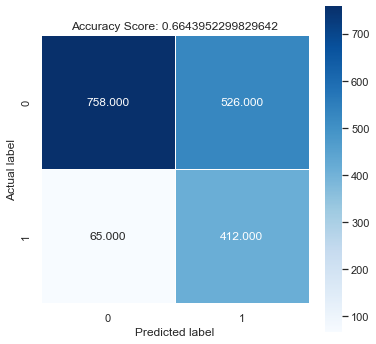

In [58]:
# SVM Model

plt.figure(figsize=(6,6))
conmat1 = confusion_matrix(Cust_y_tst, Prediction_SVM) # Confusion Matrix
sns.heatmap(conmat1, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(SVM_Accuracy)
plt.title(all_sample_title, size = 12);

print(classification_report(Cust_y_tst, Prediction_SVM))

              precision    recall  f1-score   support

          No       0.87      0.76      0.81      1284
         Yes       0.52      0.69      0.59       477

    accuracy                           0.74      1761
   macro avg       0.70      0.73      0.70      1761
weighted avg       0.78      0.74      0.75      1761



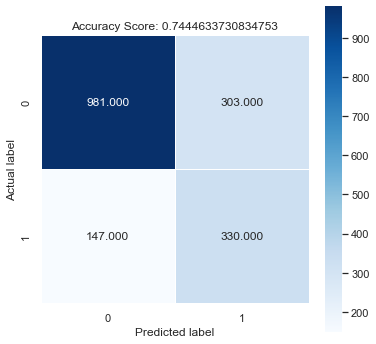

In [59]:
# Logistic Regression

plt.figure(figsize=(6,6))
conmat2 = confusion_matrix(Cust_y_tst, Prediction_Logreg) # Confusion Matrix
sns.heatmap(conmat2, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(Logreg_Accuracy)
plt.title(all_sample_title, size = 12);

print(classification_report(Cust_y_tst, Prediction_Logreg))

              precision    recall  f1-score   support

          No       0.88      0.18      0.30      1284
         Yes       0.30      0.93      0.45       477

    accuracy                           0.38      1761
   macro avg       0.59      0.56      0.38      1761
weighted avg       0.72      0.38      0.34      1761



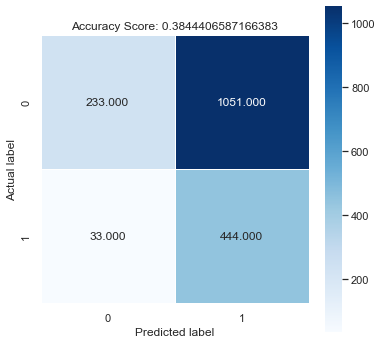

In [60]:
# KNN

plt.figure(figsize=(6,6))
conmat3 = confusion_matrix(Cust_y_tst, Prediction_KNN) # Confusion Matrix
sns.heatmap(conmat3, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(KNN_Accuracy)
plt.title(all_sample_title, size = 12);

print(classification_report(Cust_y_tst, Prediction_KNN))

#### Findings and Recommendation

The model has been trained using 3 different algorithm.

- Logistic Regression
- KNN 
- SVM

Once the model were trained the performance of the same has been evaluated on the test data set and we see that the Logistic Regression is giving the better accuracy score when compared to other two models.


The best model selected for this model is **Logistic Regression** as its giving best accuracy and precision scores
**Accuracy Score : 76 %**

The model is confident to predict 77% of the time the cusotmer's who are going to churn based on the features that are shorlisted.


#### Recommendations :- 

 - There are a few keyways that telecom companies can do to retain their customers and control customer churns. 

 - One is offer competitive rates and plans, which will attract new customers and keep current ones from switching providers. 

 - Another way is to provide excellent customer service, which will make customers happy and less likely to leave. Additionally, telecom companies can offer loyalty programs and other incentives to keep the customers coming back.

 - Telecom companies must also be aware of the latest trends and technologies to stay ahead of the competition. For example, many telecom providers are now offering VoIP, which allows customers to make phone calls over the internet. 

 - This can be great way to save money, and it’s something that many customers are looking for. 

Finally, telecom companies need to be prepared for the future by investing in new infrastructure and staying up to date with the latest advances in technology.

## Reference

Market Research Guy (2018). Types of Charts and Graphs: Choosing the Best Chart. [online] My Market Research Methods. Available at: https://www.mymarketresearchmethods.com/types-of-charts-choose/.


Pandas (2018). Python Data Analysis Library — pandas: Python Data Analysis Library. [online] Pydata.org. Available at: https://pandas.pydata.org/.


Scikit-learn.org. (2019). scikit-learn: machine learning in Python — scikit-learn 0.20.3 documentation. [online] Available at: https://scikit-learn.org/stable/index.html.

GeeksforGeeks. (2021). Python Seaborn Tutorial. [online] Available at: https://www.geeksforgeeks.org/python-seaborn-tutorial/.


matplotlib.org. (n.d.). barbs(X, Y, U, V) — Matplotlib 3.5.2 documentation. [online] Available at: https://matplotlib.org/stable/plot_types/arrays/barbs.html [Accessed 10 Jul. 2022].


www.javatpoint.com. (n.d.). K-Nearest Neighbor(KNN) Algorithm for Machine Learning - Javatpoint. [online] Available at: https://www.javatpoint.com/k-nearest-neighbor-algorithm-for-machine-learning.

Anon, (n.d.). Logistic Regression - The Ultimate Beginners Guide. [online] Available at: https://www.spss-tutorials.com/logistic-regression/.

Wikipedia Contributors (2019). Confusion matrix. [online] Wikipedia. Available at: https://en.wikipedia.org/wiki/Confusion_matrix.

Scikit-learn.org. (2018). sklearn.metrics.classification_report — scikit-learn 0.20.3 documentation. [online] Available at: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html.

‌